In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.optimize import fsolve, curve_fit, leastsq
from scipy.signal import savgol_filter
from scipy.stats import linregress

import os
import re

In [3]:
WD = '/Users/dbikiel/Dropbox/Compartidas/Compartida Dami - Seba/Obtencion Cte NO-tiol/Trazas H2S-NO/'
experiments = {}
for f in os.listdir(WD):
    name = re.split('_|.txt', f)[0:4]
    name[1] = re.split('uM', name[1])[0]
    name[3] = re.split('uM', name[3])
    name[1] = float(name[1])
    if name[3][1] == '':
        del name[3][1]
        name.append('A')
    elif name[3][1] == 'b':
        del name[3][1]
        name.append('B')
    name[3] = name[3][0].replace('(','.')
    name[3] = float(name[3].replace(')',''))

    if name[0] == 'NO':
        exp = (name[1], name[3], name[4])
    else:
        exp = (name[3], name[1], name[4])
        
    df = pd.read_csv( WD + f, header = None, sep = '\t')
    df.columns = ['time','HNO']
    
    df.time = pd.to_timedelta(df.time, unit = 'minutes')
    df = df.set_index('time')
    
    experiments[exp] = df

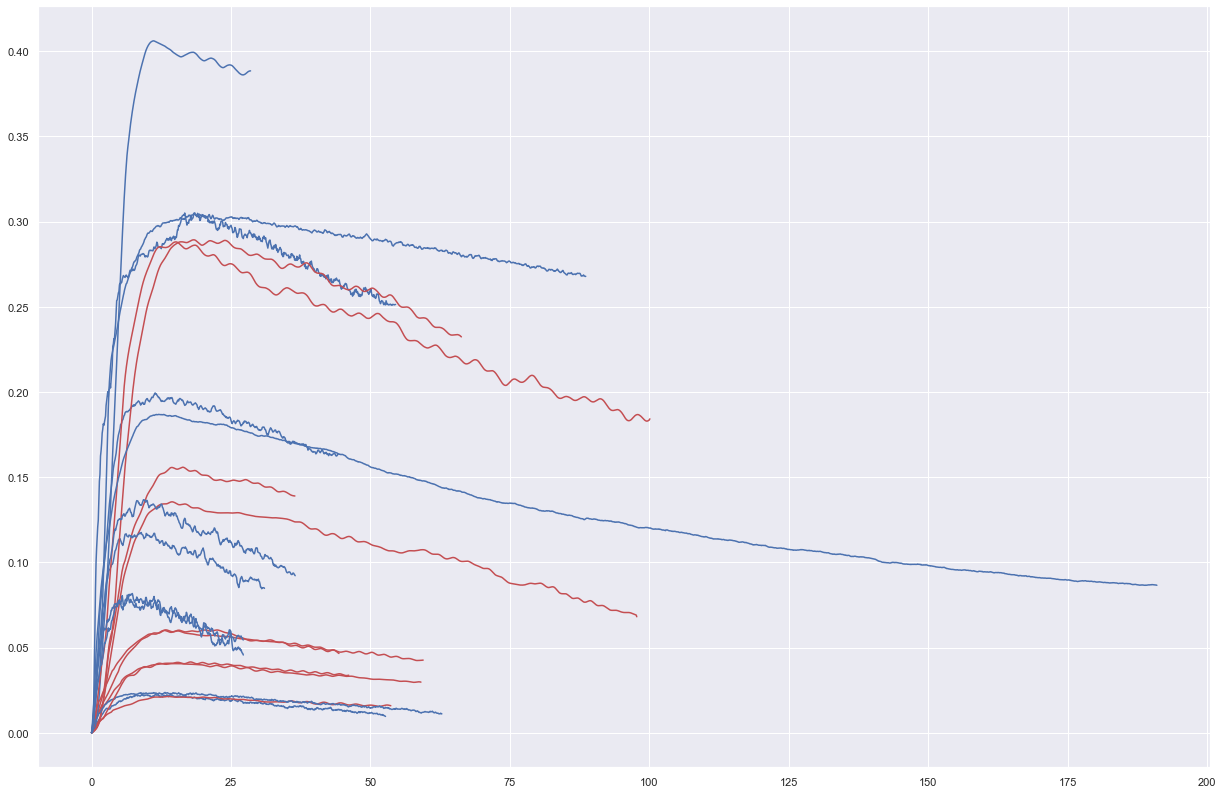

In [61]:
plt.figure(figsize=(21, 14))
for i in experiments.keys():
    if i[0] == 2.0:
        plt.plot(experiments[i].index.total_seconds(),experiments[i].HNO, 'b')
    else:
        plt.plot(experiments[i].index.total_seconds(),experiments[i].HNO, 'r')
#plt.xlim([0.0, 25.0])
plt.show()

In [7]:
sorted(list(experiments.keys()))

[(0.2, 2.0, 'A'),
 (0.4, 2.0, 'A'),
 (0.4, 2.0, 'B'),
 (0.6, 2.0, 'A'),
 (0.6, 2.0, 'B'),
 (1.0, 2.0, 'A'),
 (1.0, 2.0, 'B'),
 (1.5, 2.0, 'A'),
 (1.5, 2.0, 'B'),
 (2.0, 0.2, 'A'),
 (2.0, 0.2, 'B'),
 (2.0, 0.4, 'A'),
 (2.0, 0.4, 'B'),
 (2.0, 0.6, 'A'),
 (2.0, 0.6, 'B'),
 (2.0, 1.0, 'A'),
 (2.0, 1.0, 'B'),
 (2.0, 1.5, 'A'),
 (2.0, 1.5, 'B'),
 (2.0, 2.0, 'A')]

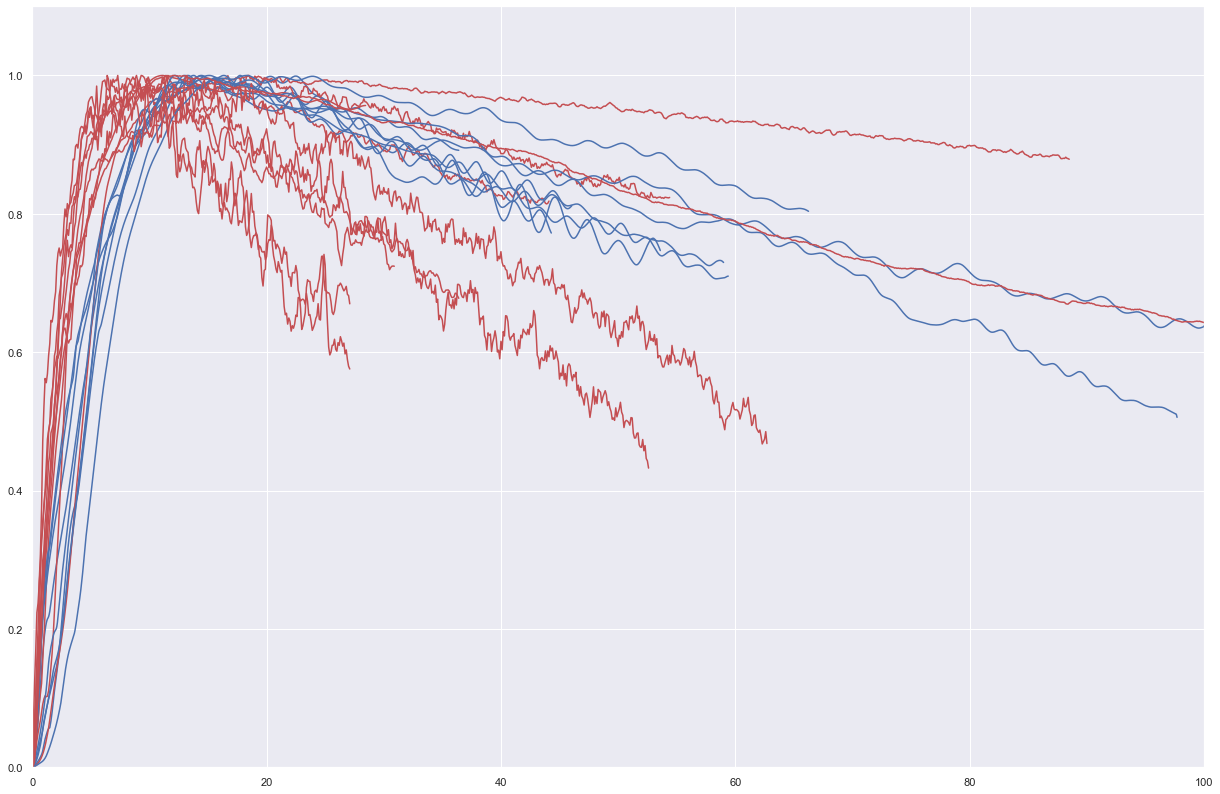

In [130]:
plt.figure(figsize = (21,14))
n_points = -1

for i in experiments.keys():
    exp = experiments[i].iloc[0:n_points]
    if i[0] == 2.0:
        plt.plot(exp['HNO'].index.total_seconds(), (exp['HNO'] - np.min(exp['HNO']))/np.max(exp['HNO']), 'r-', MarkerSize = 10)
    else:
        plt.plot(exp['HNO'].index.total_seconds(), (exp['HNO'] - np.min(exp['HNO']))/np.max(exp['HNO']), 'b-', MarkerSize = 10)
plt.axis([0, 100, 0.0, 1.1]);

In [127]:
plt.axis?